$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\ketbra}[2]{| #1\rangle \langle #2|} $
$ \newcommand{\tr}{{\rm tr}} $
$ \newcommand{\i}{{\color{blue} i}} $
$ \newcommand{\Hil}{{\cal H}} $
$ \newcommand{\V}{{\cal V}} $
$ \newcommand{\bn}{{\bf n}} $
   
# 1. Introduction to qubit physics

To understand how quantum gates are implemented, we first need to examine the qubit's physical system. In this notebook, we will see how a qubit is encoded in superconducting circuits, which approximations can be used depending on our goals, what effects arise from the interactions with the thermal bath, how the qubit-resonator interaction enables measurements, and how to define the parameters of this systems in OpenPulse.

## 1.1. The isolated qubit system

A **qubit** is any system that can be described by a two-dimensional Hilbert space, $\mathbb{C}^2$. Usually, we denote by $\{\ket{0},\ket{1}\}$ an orthonormal basis, so any arbitrary **qubit state** can be described as:
$$\ket{\psi}=\alpha\ket{0}+\beta\ket{1};\quad\alpha,\beta\in\mathbb{C},\ |\alpha|^2+|\beta|^2=1. $$
From here, we can derive all the arithmetic used in quantum computing, but the focus of this course will be on how to encode this space in a real physical system and how to implement the unitary gates used in quantum circuits. Specifically, we'll see how the qubits are encoded it transmons, also called charge-qubits.

#### Encoding a qubit in superconducting circuits
The superconducting LC circuit is a basic case where we can define a qubit, this circuit consists of a capacitor and an inductor that exchange their electric and magnetic energies in the same way as a harmonic oscillator. In fact, we can describe its energy as a quantum harmonic oscillator (QHO):
$$H_{LC}=\hbar\omega_q\left(a^\dagger a+\frac{1}{2}\right),$$
where $\omega_q$ is called the **resonance frequency**. As it's well known, the QHO has an infinite number of energy eigenstates $H_{LC}\ket{n}=E_n\ket{n}=\hbar\omega_q\left(n+1/2\right)$.<br>
<br> 
A qubit encoding can be performed by restricting the system to a subspace spanned by two of these eigenstates, for example, the conveniently labeled $\{\ket{0},\ket{1}\}$, which correspond to the ground and first excited states of the oscillator. Since energy is an observable, in principle we could measure it, collapsing the system to either $\ket{0}$ or $\ket{1}$ for any superposition of these states. We could also induce transitions between them by applying energy pulses (photons) with the appropriate energy given by the resonance frequency. But there is a major problem with the LC circuit: its harmonicity. <br>
<br>
Imagine we want to transition from the state $\ket{0}$ to $\ket{1}$. To do so, we need to apply a pulse of frequency $\omega_q$, but this frequency is also the transition frequency for $\ket{1}\leftrightarrow\ket{2}$, $\ket{2}\leftrightarrow\ket{3}$, and so on, due to the harmonicity of the oscillator. This means that we do not have control over which transition will occur. For example, if the system is initially in the state $\ket{1}$ and we want to apply an $X$ gate to transition to $\ket{0}$, the result of applying a pulse of frequency $\omega_q$ may be the desired transition to $\ket{0}$ (via stimulated emission), but also the undesired transition to $\ket{2}$ (via absorption). The latter leads to population outside the computational subspace, resulting in loss of coherence. <br>
<br>
The most popular configuration for superconducting qubits, including the so-called **transmons**, is achieved by substituting the inductor with a Josephson junction. This element changes the potential energy profile of the oscillator, resulting in non-equidistant energy levels: 
$$\left(E_{n+1}-E_{n}\right)<\left(E_{n}-E_{n-1}\right).$$

<br>
<figure style="text-align: center; margin: auto; max-width: 720px;">
    <img src="./media/transmon_potential_energy.png" width="600" alt="Transmon Potential Energy" style="display: block; margin: 0 auto;">
    <figcaption style="margin-top: 12px; font-size: 0.9em; color: #444; line-height: 1.5;">
        P. Krantz, M. Kjaergaard, F. Yan, T. P. Orlando, S. Gustavsson, W. D. Oliver; 
        A quantum engineer's guide to superconducting qubits.
        Appl. Phys. Rev. 1 June 2019; 6 (2): 021318. 
        <br>
        <a href="https://doi.org/10.1063/1.5089550" target="_blank" style="color: #0066cc;">https://doi.org/10.1063/1.5089550</a>
    </figcaption>
</figure>
<br>

In this case, the oscillator transitions have different frequencies, allowing control over which transitions can occur when applying a pulse. Considering the most generic expression for its Hamiltonian:
$$H=\sum_{n=0}^\infty\hbar\omega_{n,n+1}a^\dagger a,\quad \omega_{n,n+1}<\omega_{n-1,n}\quad \forall n;$$
where $\omega_{n,n+1}$ is the $\ket{n}\leftrightarrow\ket{n+1}$ transition frequency and the ground-state energy is set to $E_0=0$. If we want to encode our qubit in the $\{\ket{0},\ket{1}\}$ subspace, we need to use pulses with frequency $\omega_{01}$, avoiding any other undesired transition.<br>
<br>
Usually, we will consider only the computational subspace of the system, assuming negligible populations in any other excited states, using the same model as the LC circuit. Rearranging the energy offset, we can express the Hamiltonian in terms of Pauli operators:
$$H=-\hbar\omega_q\frac{\sigma_z}{2},$$
with $\omega_q=\omega_{01}$.<br>
<br>
Nevertheless, it could be interesting to study the effects of higher excited states. The transmon system is usually modeled as a Duffing oscillator:
$$H=\hbar\omega_qa^\dagger a+\frac{\hbar\alpha}{2}a^\dagger a^\dagger a a,$$
where $\omega_q=\omega_{01}$ is the resonance frequency and $\alpha=\omega_{12}-\omega_{01}<0$ is the **anharmonicity** of the qubit. 

#### The qubit rotating frame

Before studying the dynamics of the pulse interaction with the qubit, we need to consider the intrinsic dynamics of the ocillator where we have encoded it. Let's assume a 2-level qubit system initially prepared in the state: $$\ket{\psi_0}=\cos(\theta/2)\ket{0}+e^{i\phi}\sin(\theta/2)\ket{1}.$$
In the absence of external interactions, the time evolution given by the Schrödinger's equation leads, in this case, to the following time evolution unitary operator:
$$ U(t)=\exp\left(i \frac{\omega_q t}{2}\sigma_z\right) \equiv \text{RZ}\left(-\omega_q t\right).$$
which corresponds to a continous RZ rotation on the Bloch sphere, with a predictable rate set by its resonance frequency. For example, time evolution for the qubit state is, omitting global phases:
$$\ket{\psi(t)}=\text{RZ}(-\omega_q t)\ket{\psi_0}=\cos\left(\theta/2\right)\ket{0}+e^{i\left(\phi-\omega_q t\right)}\sin\left(\theta/2\right)\ket{1}.$$
The main reason for keeping track of this intrinsic time evolution is because it's often convenient to work in the **rotation frame** of the qubit, where this evolution is removed by applying the known $U(t)^\dagger$. In this frame, pulses have much simpler expressions.

<br>
<br>
<div style="text-align: center;">
  <video width="720" height="480" controls>
    <source src="./media/LarmorPrecession.mp4" type="video/mp4">
    Tu navegador no soporta el video.
  </video>
</div>
<br>
<br>

## 1.2. The open qubit system

The models from before assumed that the qubit is an isolated system, meaning that there are no interactions with its environment, so its energy remains constant. This is far from reality, as there are very relevant effects that are expected for an oscillator in a thermal bath. In superconducting computers, the qubits are immersed in a very cold thermal bath, on the order of tens to hundreds of mK, achieved by various cryogenic systems. The objective is to reduce the probability that a residual photon in the cavity with energy $\hbar\omega_q$ interacts with the qubit. Defining $k_BT$ as the mean energy of the interactions in a photonic bath at temperature $T$, the regime where the isolated approximation is valid is when $k_BT\ll \hbar\omega_q$. Nevertheless, there will always be a residual population for any excited states, given by the Gibbs thermal state:
$$P_n=\frac{1}{Z}\exp\left(-\frac{\hbar\omega_n}{k_BT}\right),$$
where $\hbar\omega_n$ is the energy of the eigenstate $\ket{n}$ and $Z$ is the partition function given by:
$$Z=\sum_{n=0}^\infty \exp\left(-\frac{\hbar\omega_n}{k_BT}\right).$$


In other words, the cold thermal bath will bring the qubit to some state very close to $\ket{0}$, with residual excited populations, from which we can operate assuming that we are working with an isolated qubit, applying the pulses to perform the desired gates in our computations. This is why the computational state $\ket{0}$ was conveniently chosen to be the ground-state and also the default initialization in many quantum circuit formalisms.<br>
<br>

Some interesting questions may arise: How does the qubit system evolve during this cooling? Does the thermal bath have a relevant effect on the qubit during the computations?<br>
<br>

This cooling process is called **thermalization** and it can be modeled using the Lindblad equations. This method consists of modeling the possible interactions of the bath's photons with the qubit, dividing them in three types:

- **Excitation**: a photon with energy $\hbar\omega_q$ interacts with the qubit, increasing its energy.
- **Relaxation**: the qubit spontaneously emits a photon of energy $\hbar\omega_q$ to the bath, decreasing its energy.
- **Dephasing**: the energy of the qubit remains the same, but the relative phase of its state shifts.

Each of this interactions has a probability of happening that depends on the bath's temperature, for example, a very warm bath will have a greater excitation probability, as its photons are more energetic. These probabilities can be parametrized by the **relaxation times**:

- $T_1$: the **longitudinal** relaxation time, which is related to the balance between excitation and relaxation interactions.
- $T_2$: the **tranverse** relaxation time, which includes the effect of the dephasing interactions.

For a system in an arbitrary mixed state:
$$\rho(0)=\begin{pmatrix}
\rho_{00}(0) & \rho_{01}(0)\\
\rho_{10}(0) & \rho_{11}(0)
\end{pmatrix},$$
the differential equation derived from the Lindblad equations has the following solution for the qubit state at any time $t$:
$$\rho(t)=\begin{pmatrix}
\rho_{00}^{eq} +\Bigl(\rho_{00}(0)-\rho_{00}^{eq}\Bigl)e^{-t/T_1} & \rho_{01}(0)e^{-t/T_2}e^{i\omega_q t}\\
\rho_{10}(0)e^{-t/T_2}e^{-i\omega_q t} & \rho_{11}^{eq} +\Bigl(\rho_{11}(0)-\rho_{11}^{eq}\Bigl)e^{-t/T_1}
\end{pmatrix},$$
where $\rho^{(eq)}$ also depends on the bath's temperature. In fact, if we take the time limit:
$$\rho^{(eq)}=\lim_{t\rightarrow\infty}\rho(t)=\begin{pmatrix}
\rho_{00}^{eq} &0\\
0 & \rho_{11}^{eq}
\end{pmatrix},$$
that corresponds to the Gibbs state from before:
$$
\begin{align*}
\rho_{00}^{eq} =  \frac{1}{Z}\exp\left(-\frac{\hbar\omega_0}{k_BT}\right),\quad
\rho_{11}^{eq} =  \frac{1}{Z}\exp\left(-\frac{\hbar\omega_1}{k_BT}\right).
\end{align*}
$$
This means that, for an arbitrary initial state, the qubit will decay to the Gibbs thermal state in some time parametrized by the relaxation time $T_1$ and $T_2$. This decay not only affecs its populations, it also changes its phase in an spiral-like form. Here there is an illustrative video of the process, for the initial state $\ket{+}$:

<br>
<br>
<div style="text-align: center;">
  <video width="720" height="480" controls>
    <source src="./media/BlochDecayScene.mp4" type="video/mp4">
    Tu navegador no soporta el video.
  </video>
</div>
<br>
<br>

As you can see, the state of the qubit (red dot) evolves in an spiraling decay (yellow curve) to some mixed state near $\ket{0}$, for a cold thermal bath. The blue sphere represents the norm of the state in the Bloch sphere, that is, its purity. At first, the sudden loss of purity would mean a loss of coherence if it happens during a computation, as we have lost track of the qubit's state. <br>
<br>
On the other hand, after enough time, the qubit state purity increases again until it reaches some asymptotic limit on the Gibbs state. This can be understood as the **initialization** of the qubit after a computation. In other words, the thermalization of the qubit let's us initialized a hopefully almost pure $\ket{0}$ state from where the computations can be performed with coherence, but it also limits the time on which operations can be performed, as it will keep interacting with the qubit, changing its state in a non-unitary fashion. This operational time, called **coherence time** is characterized by the relaxation times from before, and limits the amount of time, and so the number of operations, we can operate on the qubit.

## 1.3. The qubit-resonator coupling

Another important process in quantum computers is the measurement of the qubit state. In superconducting devices, the most common method is the **dispersive readout**, which also relies on pulse driving to acquire measurement information. Dispersive readout consists of coupling a transmon qubit to a resonator - typically a superconducting LC circuit - with a sufficiently detuned resonance frequency. In this setup, driving the resonator with a microwave pulse produces a measurable response that depends on the state of the qubit. This approach allows us to infer the qubit state by probing with the resonator, rather than interacting with the qubit directly, thereby reducing measurement-induced effects.
<br>
<figure style="text-align: center; margin: auto; max-width: 720px;">
    <img src="./media/coaxmon.png" width="400" alt="Transmon Potential Energy" style="display: block; margin: 0 auto;">
    <figcaption style="margin-top: 12px; font-size: 0.9em; color: #444; line-height: 1.5;">
        J. Rahamim, T. Behrle, M. J. Peterer, A. Patterson, P. A. Spring, T. Tsunoda, R. Manenti, G. Tancredi, P. J. Leek; Double-sided coaxial circuit QED with out-of-plane wiring. Appl. Phys. Lett. 29 May 2017; 110 (22): 222602. 
        <br>
        <a href="https://doi.org/10.1063/1.4984299" target="_blank" style="color: #0066cc;">https://doi.org/10.1063/1.4984299</a>
    </figcaption>
</figure>
<br>

This qubit-resonator system is commonly modeled by the resonant Jaynes-Cummings Hamiltonian:
$$
H_{JC}=\hbar\omega_q\frac{\sigma_z}{2}+\hbar\omega_r\left(a^\dagger a +\frac{1}{2}\right)+\hbar g \left(\sigma_+ a +\sigma_- a^\dagger\right),
$$ 
where $\omega_q$ and $\omega_r$ are the resonance frequencies of the qubit and resonator, respectively; $\sigma_z$, $\sigma_+$ and $\sigma_-$ are operators on the two-dimensional qubit space, $a\left(a^\dagger\right)$ are the annihilation(creation) operators of the resonator mode; and $g$ is the transverse coupling strength. The interaction term describes the coherent exchange between systems: when the qubit relaxes via $\sigma_-$, the resonator is excited via $a^\dagger$, and vice versa. <br>
<br>
In the **dispersive regime**, when the detuning $\Delta=|\omega_r - \omega_q|$ is much larger than the coupling strength $\left(\Delta\gg g\right)$, the direct exchange of energy between the two systems is suppressed, although entanglement and state-dependent frequency shifts can still occur. In this limit, the Hamiltonian can be approximated as:
$$
H_\text{dis}=\hbar\left(\omega_r+\chi\sigma_z\right)\left(a^\dagger a+\frac{1}{2}\right)+\hbar\tilde{\omega}_q\frac{\sigma_z}{2},
$$
where $\chi=g^2/\Delta$ is the **dispersive shift**, and $\tilde{\omega}_q=\omega_q+\chi$ is the qubit frequency detuned by the Lamb shift.<br> 
<br>
Restricting to the resonator dynamics, the shift in its resonance frequency depends on the qubit state: 

- If the qubit is in $\ket{0}$ $\left(\sigma_z\ket{0}=+\ket{0}\right)$, the resonator frequency is $\tilde{\omega}_r=\omega_r+\chi$.

- If the qubit is in $\ket{1}$ $\left(\sigma_z\ket{1}=-\ket{1}\right)$, the resonator frequency is $\tilde{\omega}_r=\omega_r-\chi$.

Thus, the qubit state can be inferred from the resonator dynamics.<br>
<br>

Finally, the probing of the resonator has to be included in the model. To acquire the measurement, a microwave pulse drive is applied on the resonator and its response is registered. In the rotating frame, the effective Hamiltonian becomes:
$$
\tilde{H}_\text{disp}=\hbar\left(\omega_r-\omega_d+\chi\sigma_z\right)a^\dagger a+\varepsilon(a+a^\dagger),
$$ 
where $\omega_d$ is the frequency and $\varepsilon$ the amplitude of the driving pulse. This Hamiltonian describes a driven quantum harmonic oscillator whose response depends on the qubit state. This is the system to which we have direct experimental access.<br>
<br>
In practice, the signal emitted by the driven resonator is amplified and demodulated using homodyne or heterodyne detection, typically via an IQ-mixer. By analyzing the resulting in-phase (I) and quadrature (Q) components of the signal, the measurement outcome that allows qubit-state classification can be extracted.

## 1.4. The qubit frame in OpenPulse

Working with high-level quantum computing SDKs -such as Qiskit-, we apply gates to qubits in order to perform operations. From a mathematical perspective, these gates are represented as unitary operators acting on the qubit Hilbert space. However, on real quantum hardware, these abstract operations must be ultimately implemente through physical control signals, such as microwave pulses. **OpenPulse** is a low-level control language within OpenQASM that allows us to describe these physical signals. Instead of working with idealized gates, OpenPulse lets us specify the shape, duration, amplitude, frequency and phase of the pulses that drive the quantum hardware.<br>
<br>
From the theoretical concepts we have seen, we can now move into practice by understanding the physical meaning of the functions and variables that OpenPulse uses to describe the qubit system.<br>

#### Calibration blocks in OpenPulse
All OpenPulse instructions must be written inside special blocks called **calibration blocks**. They come in two forms:

- **```cal```** blocks:<br>
<tab>These blocks are used to access the physical configuration of the device. In practice, they reference the hardware element we need to operate on the qubits, usually by accessing the calibrations of the device. Since these block are only used to retrieve or configure the hardware information, they are considered instantaneous and are executed before the instructions are applied on the hardware. 

- **```defcal```** blocks:<br>
<tab>These blocks define the custom pulse-level instructions for the gate implementation. It must be specify the qubits it acts on, and onced defined, it can be invoked from the main OpenQASM program just like a standard gate.

Inside these two kind of blocks there are many OpenPulse specific functions, for now, we will only focus on the ones that let us access the physical variables of the qubit system, which are usually instructed in the ```cal``` blocks. <br>

#### Communication channels to the hardware
A **```port```** represents a physical communication channel between the control system anf the quantum device. It defines the path through which signals travel, including components such as digital-to-analog convertes, amplifiers... The exact implementation of these pathways depends on the hardware provider, but usually, each qubit has associated three kinds of ports:

- **Drive port**: sends control pulses to the qubit itself, in order to perform a gate.

- **Measure port**: sends pulses to the resonator coupled to the qubit, initiating the measurement process.

- **Acquisition port**: retrieves the output signal from the resonator during the measurement, which allows us to infer the qubit state after signal post-processing.

By themselves, ports don't have enough information to perform physical control over the qubits, as they don't have access to relevant features like the resonance frequencies that allow the timing of pulse schedules.

#### Defining the physical systems

A **```frame```** provides a complete physical reference for interacting with a hardware component. It contains the following information:

- **```port```**: the communication channel used to interact with the system.

- **```frequency```**: the resonance frequency from the qubit or resonator.

- **```phase```**: the phase offset of the qubit or resonator intrinsic rotation.

By choosing a specific frame, we determine over which system we'll be interacting wih. For example:

- **Driving frame**: allows us to perform pulse-level operations over the rotation frame of the qubit, simplifying the expressions for these pulses.

- **Measurement frame**: allows to control, the driving pulse for the resonator readout.

- **Acquisition frame**: allows us to interpret the output signal from the measurement process.

In other words, frames correspond to the different rotation frames of the hardware components -qubit and resonator- that simplify the control and readout signal interpretation. Through frames, OpenPulse allows us to connect software instructions to the underlying physics of the system.

## 1.5. Examples

###  **Measuring T1**

We actually don't need OpenPulse to study qubit relaxation rate on Qmio, as we can use the already implemented ```x $QUBIT;``` gate and ```delay[TIME] $QUBIT``` instruction from OpenQASM 3.0. Here is an example to perform this measurements in OpenQASM 3.0:

In [1]:
'''
    Import of all the necessary libraries
'''
from qmio import QmioRuntimeService
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

service = QmioRuntimeService() # Instantiate QmioRuntimeService 

First, we apply the X gate, which corresponds to a schedule of calibrated pulses that, in this case, perform the transition $\ket{0}\rightarrow\ket{1}$. If we measure inmediatly after this gate application, the measured state of the qubit should be very close to $\ket{1}$, limited by the fidelity of the gate implementation. But, if we let time pass before the measurement, we can see how the qubit will decay again to the ground-state $\ket{0}$. The OpenQASM instructions are declared bellow:

In [2]:
'''
    In this function, we use a f-string to define an instruction with an external variable, _delay. 
    By calling the function with the specific value as an argument, we can recover the instructions
    for that particular value.
'''
def set_instructions(_delay):
    _instructions = f'''
    OPENQASM 3;
    x $21;
    delay[{_delay}ns] $21;
    measure $21;

    '''
    return _instructions

'''
Function to run instructions on QPU.
If the job yields an error, the message is printed.
'''

def run_instruction(_backend, _instruction, _shots):
    _res = _backend.run(circuit = _instruction, shots = _shots, res_format = 'raw')
    try :
        return _res["results"].reshape((_shots,))
    except :
        print(_res)

To visualize the decay, the delay durations are chosen from 0 to 200 $\mu s$. For each delay, a set of instructions is built with the latter function and run on the QPU backend, storing the results.

In [3]:
'''
Run the experiment on the QPU
'''

max_time = 4e5 # ns
num_steps = 10 # number of delays
delays = np.linspace(0.0, max_time, num_steps)        
shots = 1000                              

results = []
with service.backend(name = "qpu") as backend:  # Open a session with the QPU                                
    for t in delays: # Sweep the values for the delays
        inst = set_instructions(t)  # Build the instruction for the specific time                                           
        res = run_instruction(backend,  inst, shots) # Run the job on the QPU
        results.append(res) # Save the results                                               

Waiting for resources


The ```measure``` instruction returns a real value when the ```run``` method from the backend is ran. This value is the previous one to the usual discriminated output (0 or 1). For the sake of simplicity, we'll do a simple classification by sign: 

- Output $<0$, then classify to 1.

- Output $>0$, then classify to 0.

In reality, the states $\ket{0}$ and $\ket{1}$ follow asymetric-tailed normal distributions around values with these signs, that usually present a big overlap. This means that exists a non-neglegible probability -and also asymetric- of wrong classification of the states.<br>
<br>
Here there is the complete pre-processing of the data to measure $T_1$:

coeffs: [5.12553827e-01 3.05975198e-05 1.32544578e-01]


Text(0, 0.5, '$P_1$')

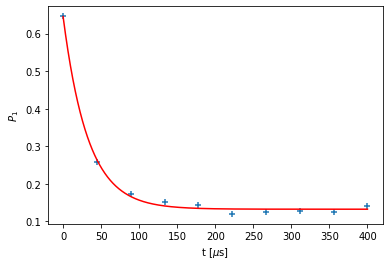

In [6]:
'''
    The output measurements are classified by sign, registering whether the observation
    yields a 1, p1 (the number of 0's is just nshots-p1). Then, we divide by the number
    of shots per job, to obtain the estimated 1 population for each delay duration.
'''
p1 = np.zeros(len(results))
for i in range(len(results)):
    for n in range(shots):
        if results[i][n] < 0:
            p1[i] += 1
p1 = p1 / shots


'''
    The scipy function curve_fit is used to fit the data to the exponential expression
    derived from the qubit thermalization behaviour studied before.
'''
from scipy.optimize import curve_fit

def func(x, a, c, d): 
    return a*np.exp(-c*x)+d

popt, pcov = curve_fit(func, delays, p1, p0 = (1, 20e-6, 0))

tt = np.linspace(0, max(delays), 1000)
yy = func(tt, *popt)

print(f'coeffs: {popt}')
plt.scatter(delays/1e3, p1, marker = '+')
plt.plot(tt/1e3, yy,color = 'red')
plt.xlabel(r't [$\mu$s]')
plt.ylabel(r'$P_1$')

In this case, the relaxation time $T_1$ is the inverse of the coefficient $c$ from the curve fit:

In [7]:
print(f'T1: {1/popt[1]*1e-9:0.4e}s')

T1: 3.2682e-05s


This measured value has a similar magnitude to the relaxation times in the calibrations from Qmio.

### **Setting up OpenPulse frames**

Below, a basic example of accessing the OpenPulse frames in Qmio is presented: 

```
OPENQASM 3;
defcalgrammar "openpulse";

cal {
    extern frame q8_drive;
    extern frame r8_measure;
    extern frame r8_acquire;
}
```

First, we declare the grammar that we'll use inside the calibration blocks, in our case the ```"openpulse"``` grammar. Inside the ```cal``` block, we import the hardware-defined external variables in which the calibrated frames are stored. This frames can later be accessed and used to interact with the system in the ```defcal``` blocks, referencing this variables. If a frame is not used, we don't need to import it. The tags used in Qmio for each frame are following, where ```QUBIT``` references the **physical qubit** numeration in the device:

- **```qQUBIT_drive```**: frame for qubit driving.
- **```rQUBIT_measure```**: frame for the resonator's measure pulse.
- **```rQUBIT_acquire```**: frame for resonator's measurement acquisition.



## References

- [1] P. Krantz, M. Kjaergaard, F. Yan, T. P. Orlando, S. Gustavsson, W. D. Oliver; A quantum engineer's guide to superconducting qubits. Appl. Phys. Rev. 1 June 2019; 6 (2): 021318. https://doi.org/10.1063/1.5089550

- [2] J. Rahamim, T. Behrle, M. J. Peterer, A. Patterson, P. A. Spring, T. Tsunoda, R. Manenti, G. Tancredi, P. J. Leek; Double-sided coaxial circuit QED with out-of-plane wiring. Appl. Phys. Lett. 29 May 2017; 110 (22): 222602. https://doi.org/10.1063/1.4984299